# <center>Machine Learning Project</center>

** **
## <center>*03 - Feature Selection*</center>

** **

## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>


1. [Filter Methods](#1-filter-methods)<br>  
    1.1 [Univariate Variables](#11-univariate-variables)<br>  
    1.2 [Correlation Indices](#12-correlation-indices)<br>    
    1.3 [Chi-Squared](#13-chi-squared)<br><br>     
2. [Wrapper Methods](#2-wrapper-methods)<br>    
    2.1 [Logistic Regression](#21-logistic-regression)<br>    
    2.2 [Support Vector Machine](#22-support-vector-machine)<br><br>      
3. [Embedded Methods](#3-embedded-methods)<br>     
    3.1 [LassoCV](#31-lassocv)<br>  



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

from utils import *


In [10]:
pd.set_option("display.max_rows", None)

# No train temos de input:
- Average Weekly Wage
- Age at Injury

- Based on the new Age at Injury calcular o Birth Year

*Input `Birth Year`*

In [2]:
# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN
#condition = train_df['Birth Year'].isna() & train_df['Age at Injury'].notna() & train_df['Accident Date'].notna()
# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury'
#train_df.loc[condition, 'Birth Year'] = train_df.loc[condition, 'Accident Date'].dt.year - train_df.loc[condition, 'Age at Injury']

# Filter the rows where 'Birth Year' is NaN, but 'Age at Injury' and 'Accident Date' are not NaN in the test dataset
#condition = test_df['Birth Year'].isna() & test_df['Age at Injury'].notna() & test_df['Accident Date'].notna()
# Replace missing 'Birth Year' with the difference between 'Accident Date' year and 'Age at Injury' where the condition is true
#test_df.loc[condition, 'Birth Year'] = test_df.loc[condition, 'Accident Date'].dt.year - test_df.loc[condition, 'Age at Injury']

In [3]:
# Import dataset
train_df = pd.read_csv('preprocessed_data/train_data.csv')
test_df =  pd.read_csv('preprocessed_data/test_data.csv')

In [19]:
top_keywords = (
    train_df['Carrier Name']
    .str.split(expand=True)              # Split the carrier names into separate words
    .stack()                              # Stack into a single column
    .reset_index(drop=True)              # Reset index to clean up the DataFrame
    .str.replace(r',', '', regex=True)   # Remove commas
    .str.replace(r'\.', '', regex=True)   # Remove periods
    .str.replace(r'\bOF\b', '', regex=True)  # Drop "OF" words
    .str.replace(r'&', '', regex=True)    # Drop "&" symbols 
    .str.replace(r'\bINS\b', 'INSURANCE', regex=True)  # Replace "INS" with "INSURANCE"
    .str.replace(r'\bCO\b', 'COMPANY', regex=True)  
    .str.replace(r'\bCORP\b', 'CORPORATION', regex=True) 
    .str.strip()                         # Remove leading/trailing whitespace
)

# Get top 30 keywords, excluding empty strings
top_15_keywords = top_keywords[top_keywords != ''].value_counts().head(15)

# Display the result
print(top_15_keywords)

INSURANCE      334813
COMPANY        199629
STATE          113187
FUND           112653
INDEMNITY       55998
FIRE            48440
CORPORATION     43821
AMERICAN        34670
CASUALTY        30867
NEW             26469
NATIONAL        24813
ZURICH          22512
AMERICA         22214
INC             21859
POLICE          21652
Name: count, dtype: int64


In [22]:
train_df['Carrier Name'].unique()

array(['NEW HAMPSHIRE INSURANCE CO', 'ZURICH AMERICAN INSURANCE CO',
       'INDEMNITY INSURANCE CO OF', ..., 'MARATHON CENTRAL SCHOOL DIST',
       'CAMBRIDGE CENTRAL SCHOOL', 'HERMON-DEKALB CENTRAL'], dtype=object)

In [23]:
for value in train_df['Carrier Name'].unique():
    if value not in test_df["Carrier Name"].unique():
        print(value)

BATH & BODY WORKS, INC.
COLUMBIA COUNTY MUT SELF INS
SARATOGA COUNTY
NYU HOSPITALS CENTER
HEALTH & HOSPITALS CORP. CNY
DUTCHESS COUNTY
ST LAWRENCE COUNTY
DUTCHESS COUNTY SELF-INS PLAN
MONROE-WOODBURY CENTRAL
ONONDOGA COUNTY SELF INSURANCE
HARRISON CENTRAL SCHOOL DIST
SAUQUOIT VALLEY CENTRAL SCH
CITY OF ALBANY NEW YORK
ST. LAWRENCE-LEWIS COUNTIES
TROY CITY OF
RHINEBECK CSD
AUBURN ENLARGED CITY SCH DIST
MONTICELLO CENTRAL
WINDSOR CSD
NEW YORK CITY TRANSIT AUTH
SARATOGA COUNTY SELF-INS. PLAN
L BRANDS INC
BROOME-DELAWARE-TIOGA BOCES
WESTCHESTER COUNTY HEALTH
COUNTY OF ULSTER
MARRIOTT CORPORATION
ALLIANCE NATIONAL INSURANCE CO
COUNTY OF ORANGE
NIAGARA COUNTY MUTUAL SELF INS
WENDY'S INTERNATIONAL, LLC
ALLIANCE NATIONAL INS CO
DOLGENCORP OF NEW YORK, INC.
CINCINNATTI CASUALTY COMPANY
CITY OF SCHENECTADY
SCHENECTADY COUNTY
NORTH COLONIE CENTRAL
CROUSE HEALTH HOSPITAL INC
SUFFOLK COUNTY OF
RENSSELAER COUNTY SELF-
ST. MARY'S HEALTHCARE
PENFIELD CSD
CITY OF MOUNT VERNON
LIMITED BRANDS, INC.
MANHA

KeyboardInterrupt: 

In [24]:
print("______________")
for value in test_df['Carrier Name'].unique():
    if value not in train_df["Carrier Name"].unique():
        print(value)

______________
ALLSTATE INDEMNITY COMPANY
BOLTON CSD
VILLAGE OF SCOTTSVILLE
SCHROON LAKE CSD
LOWVILLE CENTRAL SCHOOL
ULLICO CASUALTY COMPANY
GRANVILLE CSD
THOUSAND ISLAND CENTRAL
HOLLAND PATENT CENTRAL SCHOOL
TRAVELERS PROPERTY CAS. INS.
MONTAUK UNION FREE
NORTH POINTE INSURANCE CO.
BIRDS EYE FOODS INC
COREPOINTE  INSURANCE COMPANY
DEPUTY DIRECTOR OF HUMAN RESOU
FRANKLIN CENTRAL SCHOOL
ROCHESTER GENERAL HOSPITAL
SAFETY FIRST INSURANCE CO
TOWN OF ORCHARD PARK
VILLAGE OF SPENCERPORT
TOWN OF PARMA
CLYDE-SAVANNAH CENTRAL
CORINTH CSD
VILLAGE OF FAIRPORT
ANDOVER CENTRAL SCHOOL DIST
COREPOINTE INSURANCE CO
FIRE & CASUALTY INS CO OF CONN
TOWN OF NEWBURGH
MAJESTIC INSURANCE COMPANY
NEW LEBANON CENTRAL
TRAVELERS COMMERCIAL INS CO
NATIONWIDE GENERAL INSURANCE
PROJECT P HOLDINGS, LLC
FULTON BOILER WORKS INC
EAST HAMPTON, TOWN OF
EDMESTON CSD
CEDAR INSURANCE COMPANY
VILLAGE OF HILTON
MOTORISTS COMMERCIAL MUTUAL
TRAVELERS CASUALTY & SURETY
NY MCDONALD'S OPER WC TRUST
CLINTON CENTRAL SCHOOL
FIDELITY 

In [ ]:
# ver as keyworkd no carrier name e criar dummies para elas

In [14]:
#pd.set_option("display.max_rows", None)
#train_df.sample().T
#pd.set_option("display.max_rows", 10)

In this part we will identify and choose the most relevant variables for our model.

In order to that, we can improve model performance, reduce overfitting and speeds up the training set by removing redundant, irrelevant, or noisy data.

So, we will evaluate using at least one of each method (filter, wrapper, embedded). 

In [12]:
test_df["Age at Injury"].min()

5

#### <span style="color:salmon"> 1. Filter methods  </span> 

##### <span style="color:salmon"> 1.1 Univariate variables </span> 

First we check for univariate variables, that means, that have the variance equal to 0.

In [45]:
train_scaled_df.var()

Age at Injury                   0.019172
Average Weekly Wage             0.000005
Birth Year                      0.013738
IME-4 Count                     0.000692
Number of Dependents            0.111142
Accident Date_Year              0.000894
Accident Date_Month             0.099216
Accident Date_Day               0.085774
Accident Date_DayOfWeek         0.091192
Assembly Date_Year              0.164171
Assembly Date_Month             0.097921
Assembly Date_Day               0.084744
Assembly Date_DayOfWeek         0.057437
C-2 Date_Year                   0.024899
C-2 Date_Month                  0.076715
C-2 Date_Day                    0.078976
C-2 Date_DayOfWeek              0.048229
C-3 Date_Year                   0.219309
C-3 Date_Month                  0.094777
C-3 Date_Day                    0.084224
C-3 Date_DayOfWeek              0.056107
First Hearing Date_Year         0.193120
First Hearing Date_Month        0.082778
First Hearing Date_Day          0.070566
First Hearing Da

In [46]:
test_scaled_df.var()

Age at Injury                   0.020381
Average Weekly Wage             0.000001
Birth Year                      0.014501
IME-4 Count                     0.000106
Number of Dependents            0.110887
Accident Date_Year              0.000676
Accident Date_Month             0.100891
Accident Date_Day               0.085130
Accident Date_DayOfWeek         0.088599
Assembly Date_Year              0.052402
Assembly Date_Month             0.092828
Assembly Date_Day               0.085768
Assembly Date_DayOfWeek         0.057324
C-2 Date_Year                   0.022972
C-2 Date_Month                  0.070692
C-2 Date_Day                    0.079819
C-2 Date_DayOfWeek              0.049612
C-3 Date_Year                   0.171282
C-3 Date_Month                  0.059049
C-3 Date_Day                    0.063784
C-3 Date_DayOfWeek              0.043283
First Hearing Date_Year         0.098552
First Hearing Date_Month        0.037356
First Hearing Date_Day          0.034263
First Hearing Da

As we can see, there is no variable with 0.0, so there are no univariate variables on train_scaled_df and test_scaled_df.

Since it doesn't exist, we don't need to change anything in the dataset.

##### <span style="color:salmon"> 1.2 Correlation indices </span> 

Now let's see the correlation between the variables using the spearman method.

To do that, we first need to create a function with some parameters in order to see the heatmap.

In [47]:
def cor_heatmap(cor):
    plt.figure(figsize=(22,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

Then, we call the method spearman:

In [48]:
cor_spearman = train_scaled_df.corr(method ='spearman')
cor_spearman

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_Year,Accident Date_Month,Accident Date_Day,Accident Date_DayOfWeek,Assembly Date_Year,...,C-2 Date_Day,C-2 Date_DayOfWeek,C-3 Date_Year,C-3 Date_Month,C-3 Date_Day,C-3 Date_DayOfWeek,First Hearing Date_Year,First Hearing Date_Month,First Hearing Date_Day,First Hearing Date_DayOfWeek
Age at Injury,1.000000,0.076646,-0.991428,0.125671,-0.000119,-0.019442,-0.020862,-0.005377,-0.042088,-0.015506,...,-0.007479,-0.001778,0.112017,0.109097,0.111472,0.109858,0.117486,0.117905,0.117552,0.117577
Average Weekly Wage,0.076646,1.000000,-0.075168,0.053965,-0.003035,0.005870,-0.004049,0.000919,-0.006062,0.010202,...,-0.002116,0.003601,0.082877,0.079989,0.080077,0.079890,0.024774,0.018408,0.017528,0.019451
Birth Year,-0.991428,-0.075168,1.000000,-0.122584,0.000233,0.093478,0.033102,0.006151,0.042073,0.072856,...,0.010295,0.004550,-0.105175,-0.107536,-0.111456,-0.109842,-0.113534,-0.118412,-0.117764,-0.117605
IME-4 Count,0.125671,0.053965,-0.122584,1.000000,0.001958,-0.023909,-0.005387,0.001329,-0.005032,-0.036687,...,0.022995,0.034253,0.475693,0.473395,0.472360,0.472434,0.653263,0.648866,0.649501,0.650031
Number of Dependents,-0.000119,-0.003035,0.000233,0.001958,1.000000,0.003348,-0.001777,-0.001137,0.001729,0.002998,...,0.000126,0.000982,-0.001724,-0.001886,-0.002011,-0.001825,0.001133,0.000853,0.000807,0.001399
Accident Date_Year,-0.019442,0.005870,0.093478,-0.023909,0.003348,1.000000,-0.070352,-0.017042,-0.007696,0.932059,...,0.020925,0.024078,0.050145,-0.051169,-0.057449,-0.055722,0.003997,-0.059449,-0.057988,-0.055007
Accident Date_Month,-0.020862,-0.004049,0.033102,-0.005387,-0.001777,-0.070352,1.000000,0.002790,-0.009345,0.010180,...,0.000343,-0.010635,-0.008426,0.044818,-0.012826,-0.015088,0.005467,-0.022158,-0.010936,-0.009557
Accident Date_Day,-0.005377,0.000919,0.006151,0.001329,-0.001137,-0.017042,0.002790,1.000000,-0.009054,0.000523,...,0.055419,0.001037,0.001412,0.003804,0.000015,0.002387,0.000983,0.001506,0.001255,0.001149
Accident Date_DayOfWeek,-0.042088,-0.006062,0.042073,-0.005032,0.001729,-0.007696,-0.009345,-0.009054,1.000000,-0.007115,...,0.002590,-0.046151,0.000979,0.002040,0.002673,0.000530,0.001487,0.002446,0.002167,0.002079
Assembly Date_Year,-0.015506,0.010202,0.072856,-0.036687,0.002998,0.932059,0.010180,0.000523,-0.007115,1.000000,...,-0.004473,0.017835,0.060679,-0.054223,-0.052758,-0.050883,0.006206,-0.059161,-0.057265,-0.054040


And finally we call the function we created to see the correlation of the variables through the heatmap

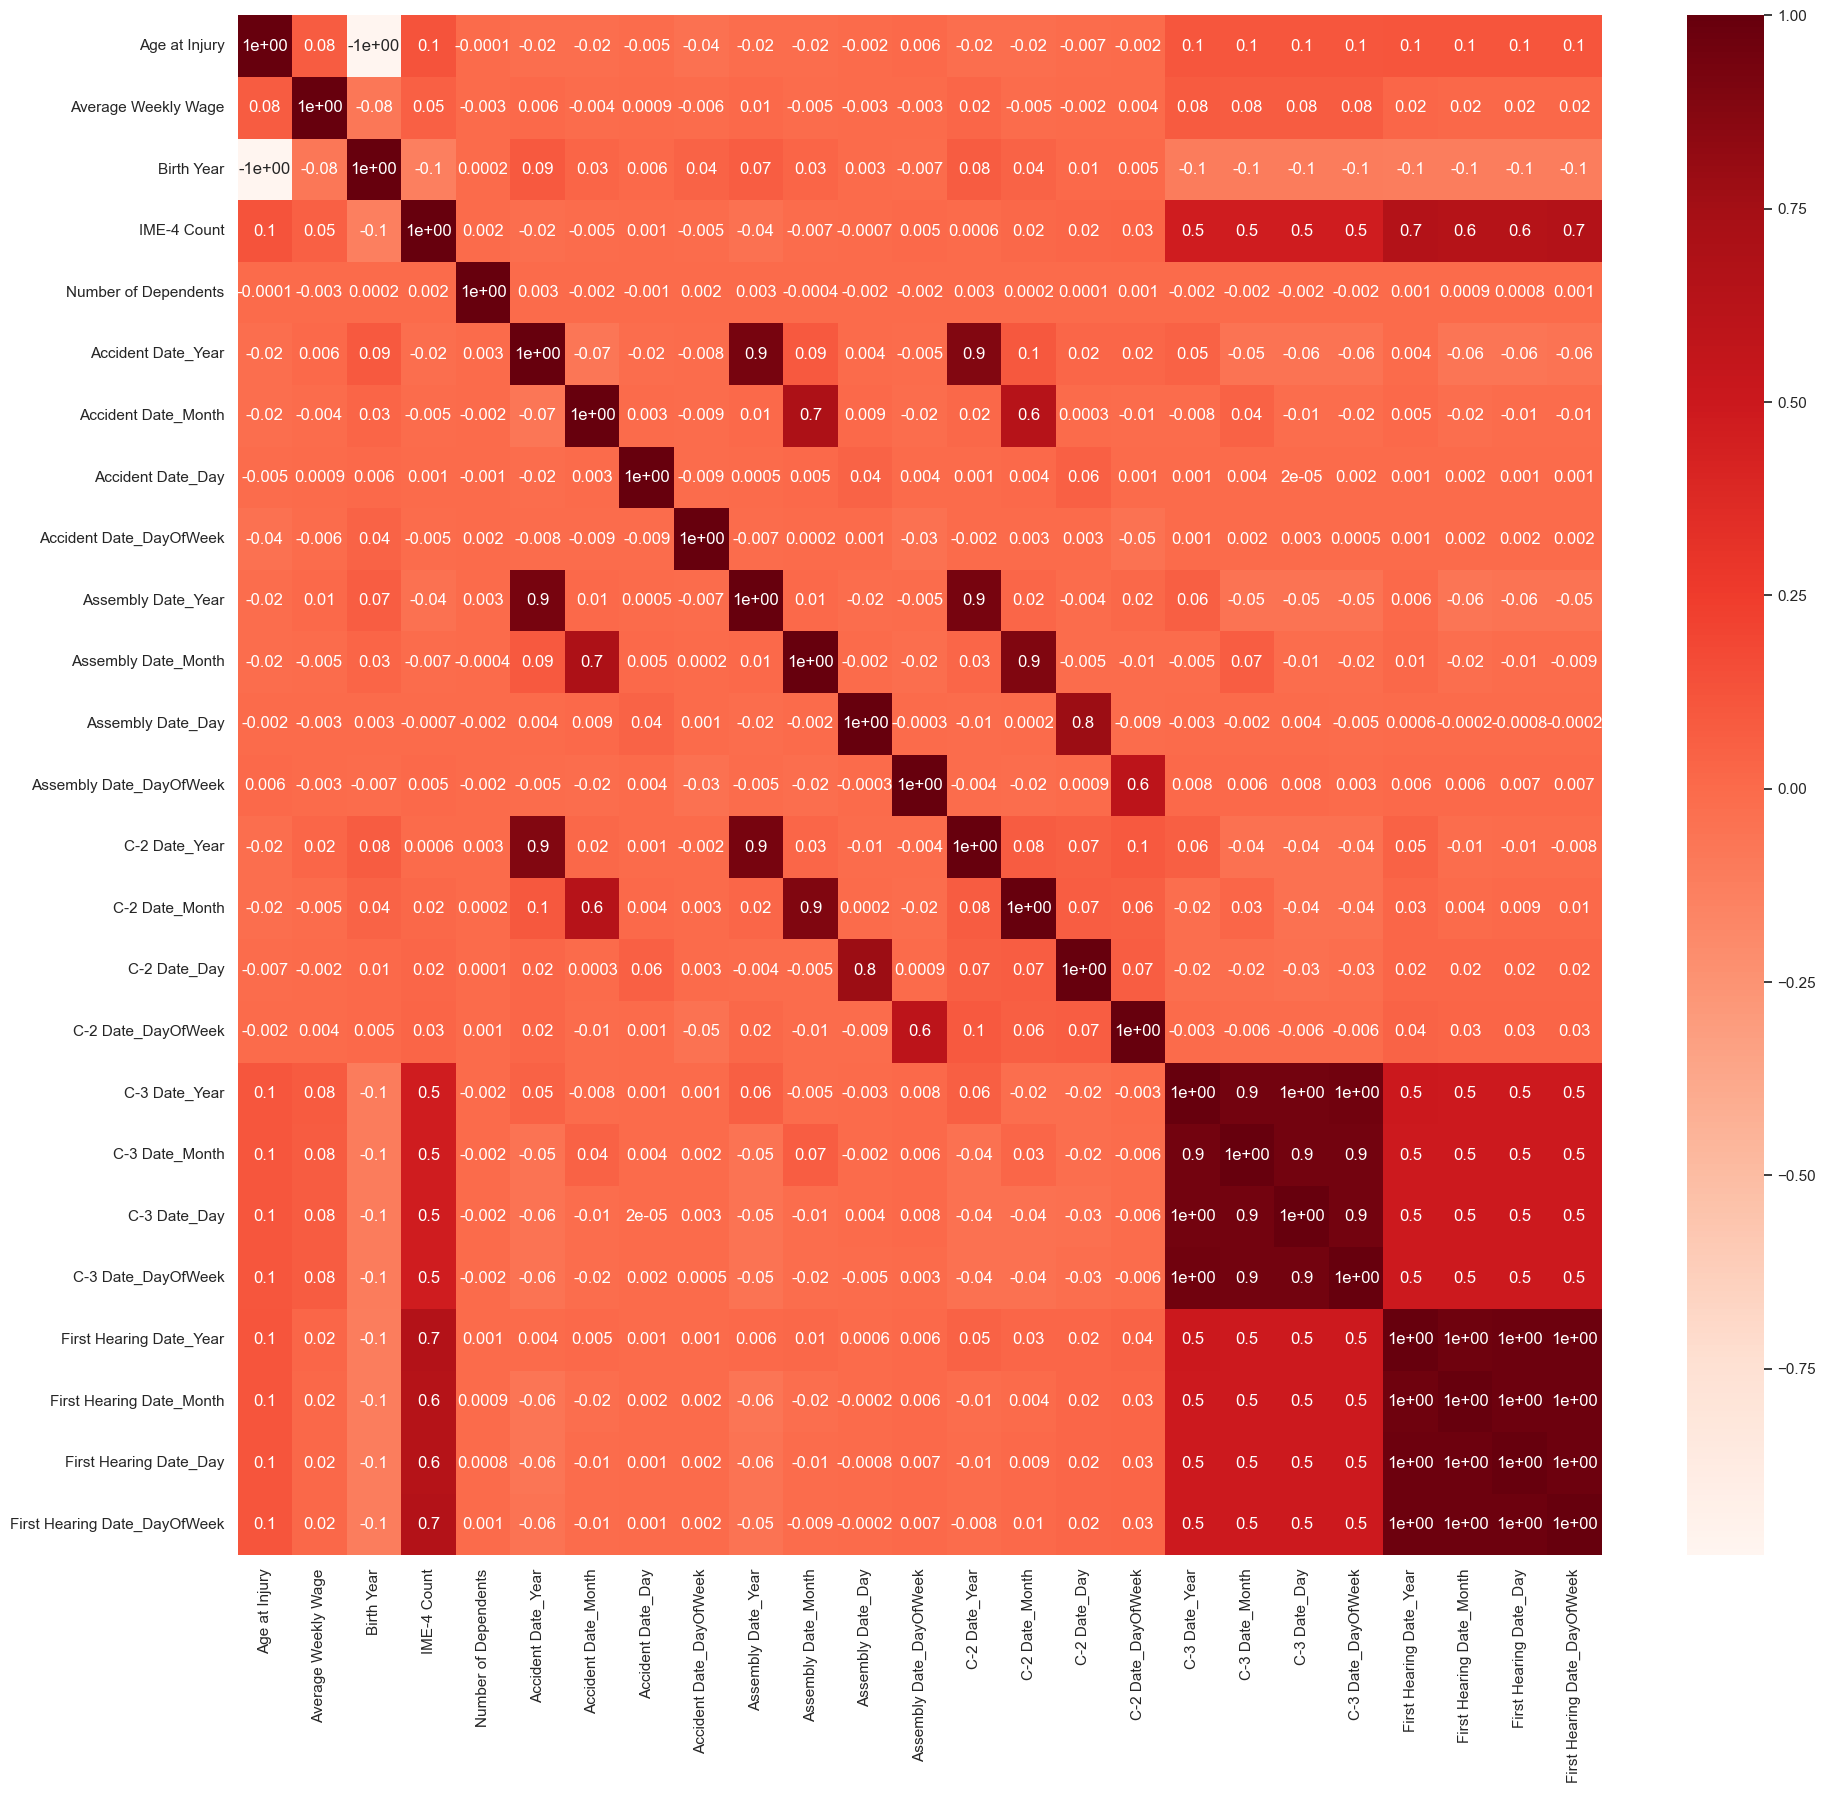

In [49]:
cor_heatmap(cor_spearman)

We can conclude that:
- This method it's not enough to decide which variables we should keep
- The pairs that are more correlated are:
    - Accident date_year vs Assembly Date_year
    - Accident date_year vs C-2 Date year
    - Assembly Date Year vs C-2 Date year
    - Assembly Date_Month vs C-2 Date month
    - Assembly Date_Day vs C-2 Date day
    - C-3 Date_Year vs C-3 Date month
    - C-3 Date_Month vs C-3 Date day
    - C-3 Date_Year vs C-3 Date day
    - First Hearing Date_Year vs First Hearing Date_Month
    - First Hearing Date_Year vs First Hearing Date_Day
    - First Hearing Date_Day vs First Hearing Date_Month

##### <span style="color:salmon"> 1.3 Chi-squared </span> 

To check the importance of the categorical variables in the target, we use the method Chi-squared.

The function TestIndependence, is defined in utils.py.

In [50]:
for var in categorical_df.columns:
    TestIndependence(training_df[var],training_df['Claim Injury Type'], var)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
Agreement Reached is IMPORTANT for Prediction
WCB Decision is NOT an important predictor. (Discard WCB Decision from 

Taking into account the test, the least important variables are: WCB Decision.

All the other variables are relevant.

#### <span style="color:salmon"> 2. Wrapper methods  </span> 

The method we choose is Recursive Feature Elimination (RFE). This allow to select the most important features.

Use a predict model that run multiple times and in each, remove the least important variable.

First, we need to separate features and target for training, validation, and test datasets:

In [9]:
features_to_select = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Accident Date_Year', 'Accident Date_Month', 'Accident Date_Day', 'Accident Date_DayOfWeek', 'Assembly Date_Year', 'Assembly Date_Month', 'Assembly Date_Day', 'Assembly Date_DayOfWeek', 'C-2 Date_Year', 'C-2 Date_Month', 'C-2 Date_Day', 'C-2 Date_DayOfWeek', 'C-3 Date_Year', 'C-3 Date_Month', 'C-3 Date_Day', 'C-3 Date_DayOfWeek', 'First Hearing Date_Year', 'First Hearing Date_Month', 'First Hearing Date_Day', 'First Hearing Date_DayOfWeek'
] 

In [10]:
X_train = train_scaled_df[features_to_select]
y_train = training_df['Claim Injury Type']
X_val = validation_scaled_df[features_to_select]
y_val = validation_df['Claim Injury Type']

##### <span style="color:salmon"> 2.1 Logistic Regression </span> 

Store in mod a logistic regression classifier:

In [53]:
mod = LogisticRegression()

Then, we store in the variable rfe the model RFE:

In [54]:
rfe = RFE(estimator=mod, n_features_to_select=3) 

In order to tranform the data and assign the X_train and y_train, we apply the function fit_transform:

In [55]:
X_rfe = rfe.fit_transform(X = X_train, y = y_train)

To see all the columns and check the most important variables in the dataset:

In [56]:
X_train.columns

Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
       'Number of Dependents', 'Accident Date_Year', 'Accident Date_Month',
       'Accident Date_Day', 'Accident Date_DayOfWeek', 'Assembly Date_Year',
       'Assembly Date_Month', 'Assembly Date_Day', 'Assembly Date_DayOfWeek',
       'C-2 Date_Year', 'C-2 Date_Month', 'C-2 Date_Day', 'C-2 Date_DayOfWeek',
       'C-3 Date_Year', 'C-3 Date_Month', 'C-3 Date_Day', 'C-3 Date_DayOfWeek',
       'First Hearing Date_Year', 'First Hearing Date_Month',
       'First Hearing Date_Day', 'First Hearing Date_DayOfWeek'],
      dtype='object')

In [57]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False])

Let's see how important is the variables using the function ranking:

In [58]:
rfe.ranking_

array([ 5, 23,  3,  1, 20,  2, 21, 19, 22,  7, 12, 18, 17,  1, 14, 16, 15,
        4,  6,  9, 11,  1,  8, 10, 13])

In the ranking:
- rank = 1: one of the most important features
- rank > 1: Indicates the feature's rank. Higher values mean the feature was considered less important and eliminated earlier in the recursive process.

Finally, to know which variables we should keep, we create an object that gives a boolean value as output:

In [59]:
selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features

Age at Injury                   False
Average Weekly Wage             False
Birth Year                      False
IME-4 Count                      True
Number of Dependents            False
Accident Date_Year              False
Accident Date_Month             False
Accident Date_Day               False
Accident Date_DayOfWeek         False
Assembly Date_Year              False
Assembly Date_Month             False
Assembly Date_Day               False
Assembly Date_DayOfWeek         False
C-2 Date_Year                    True
C-2 Date_Month                  False
C-2 Date_Day                    False
C-2 Date_DayOfWeek              False
C-3 Date_Year                   False
C-3 Date_Month                  False
C-3 Date_Day                    False
C-3 Date_DayOfWeek              False
First Hearing Date_Year          True
First Hearing Date_Month        False
First Hearing Date_Day          False
First Hearing Date_DayOfWeek    False
dtype: bool

therefore, the variables we must maintain are:
- IME-4 Count
- C-2 Date_Year
- First Hearing Date_Year

To check the score of the estimator using a diferent number of features:

In [60]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.622952


According to Logistic Regression, the optimal number of features are 3.

To see the accurancy in train and in validation:

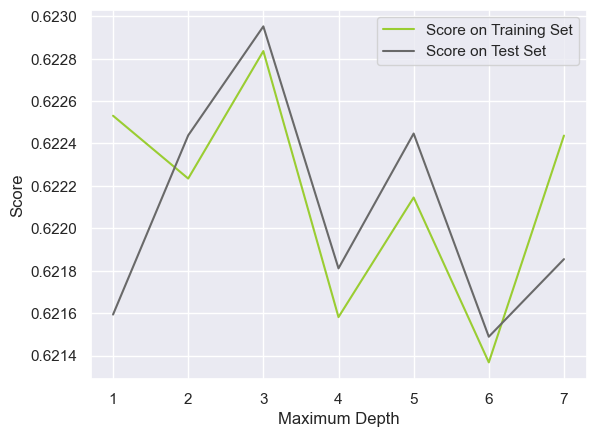

In [61]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

##### <span style="color:salmon"> 2.2 Support Vector Machine </span> 

In order to compare with other methods, we will do the same procedure for SVM.

To check the score of the estimator using a diferent number of features, and which features we should keep:

In [ ]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = SVC(kernel = 'linear')
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_train)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

#### <span style="color:yellow"> ACABAR </span> 
According to Logistic Regression, the most important variables that we should keep are:
- ?????

To see the accurancy in train and in validation:

In [1]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

#### <span style="color:salmon"> 3. Embedded methods  </span> 

##### <span style="color:salmon"> 3.1 LassoCV </span> 

Using LassoCV, create a Lasso Regression instance called reg

In [7]:
reg = LassoCV()

Fit the data, using the mmethod fit():

In [ ]:
reg.fit(X_train, y_train)

ValueError: could not convert string to float: '2. NON-COMP'

create an object Series:

In [14]:
coef = pd.Series(reg.coef_, index = train_scaled_df.columns)
coef

AttributeError: 'LassoCV' object has no attribute 'coef_'

Check how many variables did Lasso picked (if the coef is different from 0) and how many variables did Lasso eliminated (if the coef is equal to 0).

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Sort the values of `coef` using the method `sort_values()`.

In [ ]:
coef.sort_values()

By calling the function `plot_importance()` that we created on step 15, plot the feature importance of the variables, by passing as parameters the object `coef` and the name `"Lasso"`

In [2]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
plot_importance(coef,'Lasso')

#### <span style="color:yellow"> ACABAR </span> 
CONCLUSAO DO GRAFICO